# DECISION TREE CLASSIFICATION USING ENTROPY AND GINI INDEX:


### Dataset: Red Wine classification dataset


### Contents

#### Input variables (based on physicochemical tests):

1. fixed acidity

2. volatile acidity

3. citric acid

4. residual sugar

5. chlorides

6. free sulfur dioxide

7. total sulfur dioxide

8. density

9. pH

10. sulphates

11. alcohol

#### Output variable (based on sensory data):

1. quality (score between 0 and 10)
<br>


## 1. LOAD AND EXPLORATION
<br>

In [21]:
#importing libraries

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report,confusion_matrix

from sklearn.tree import DecisionTreeClassifier



In [22]:
#loading the data

df = pd.read_csv('./winequality-red.csv')
print('The Dataset contains {} rows and {} columns '.format(df.shape[0], df.shape[1]))

The Dataset contains 1599 rows and 12 columns 


In [23]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [24]:
#getting the statiscal information

df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## 2. **DATA CLEANING**


<br>



In [25]:
#counting the frequency of each element from the 'quality'

df['quality'].value_counts().index

Int64Index([5, 6, 7, 4, 8, 3], dtype='int64')

#### So the ratings are 3,4,5,6,7 and 8 making only 6 values in quality column
<br>
<br>

<AxesSubplot:>

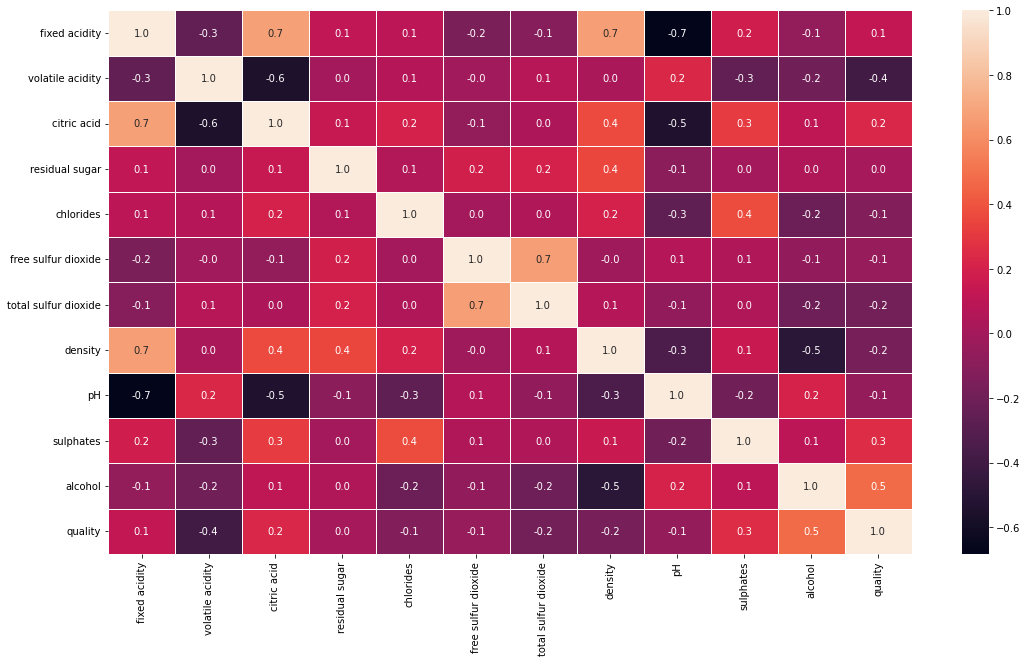

In [26]:
#correlation between the columns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, fmt = ".1f", linewidths = .7)

#### **Checking for missing values:**

In [27]:

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### *There are no missing values in the dataset*<br><br>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB



### **Now Showing the distribution of each feature:**
<br>

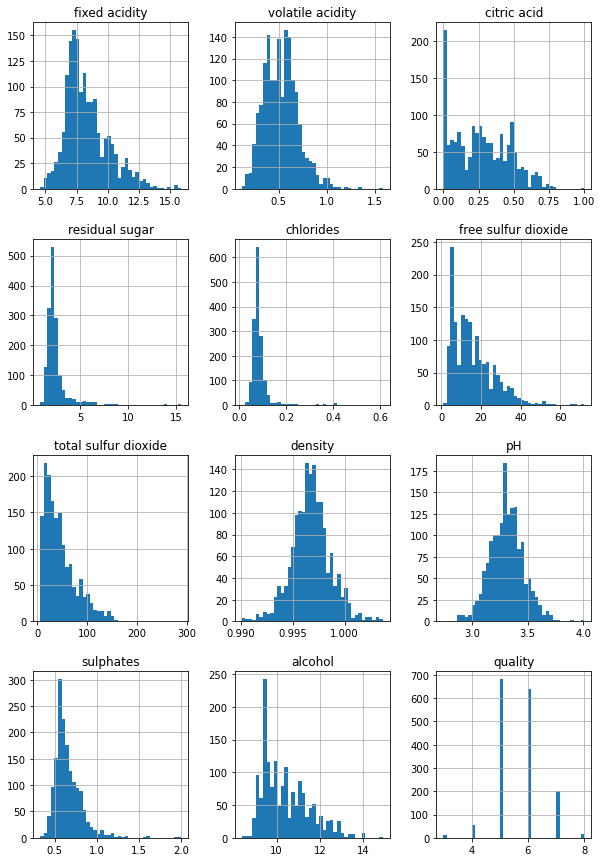

In [29]:
df.hist(bins=40, figsize=(10,15))
plt.show()

### What do we Understand?

#### Data distribution for attribute “alcohol” is positively skewed, for attribute “density” data quite normally distributed. Take attention to the wine quality data distribution. It’s a bimodal distribution and there are more wines with average quality than wines with ‘good’ or ‘bad’ quality.

In [30]:
#counting the frequency of each element from the 'class'

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Human wine preferences scores varied from 3 to 8, so it’s straightforward to categorize answers into ‘bad’ or ‘good’ quality of wines. We assign for categorizes corresponding discrete values 0 or 1.

### Good - 1, Bad - 0

In [31]:
# Dividing wine as good and bad by giving the limit for the quality

bins = (2, 6, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [32]:
print(df['quality'].value_counts())

bad     1382
good     217
Name: quality, dtype: int64


In [33]:
# assign labels to our quality variable

label_quality = LabelEncoder()

# Bad becomes 0 and good becomes 1

df['quality'] = label_quality.fit_transform(df['quality'])


In [34]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

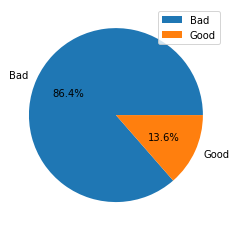

In [35]:
#proportion of different elements of the class


plt.pie(df['quality'].value_counts(),autopct="%1.1f%%",labels=['Bad','Good'])
plt.legend();

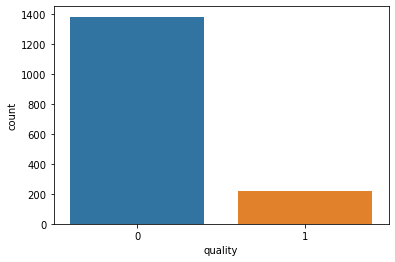

In [36]:
#plot to show count of labels

sns.countplot(x=df['quality'])
plt.show()

In [37]:
#Filter the dataset for input and output

x = df.drop(['quality'], axis=1)
y = df['quality']

In [38]:
#splitting the processed dataset into train and test dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

<br>
<br>


# A)  ALGORITHM FOR DECISION TREE IMPLEMENTED FROM SCRATCH

## Entropy and GINI INDEX

In [41]:
#class node for representing each node of the decision tree
class Node():
    #constructor
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None): 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

class MyDecisionTreeClassifier():
    #constructor
    def __init__(self, criterion="gini", min_samples_split=2, max_depth=2):
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.criterion = criterion
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    #recursive function to build the tree
    def build_tree(self, dataset, curr_depth=0):
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if "info_gain" in best_split and best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    #function to find the best split
    def get_best_split(self, dataset, num_samples, num_features):
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, self.criterion)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    #function to split the data
    def split(self, dataset, feature_index, threshold):
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    #function to compute information gain
    def information_gain(self, parent, l_child, r_child, mode="gini"):
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    #function to compute entropy
    def entropy(self, y):
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    #function to compute gini index
    def gini_index(self, y):
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    #function to compute leaf node
    def calculate_leaf_value(self, Y):
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    #function to print the tree
    def print_tree(self, tree=None, indent=" "):
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent+indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent+indent)
    
    #function to train the tree
    def fit(self, X, Y):
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    #function to predict new dataset
    def predict(self, X):
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    #function to predict a single data point
    def make_prediction(self, x, tree):
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

        

In [42]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)

In [44]:
#split train and test samples

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)


## 4. TRAIN THE MODEL
### A) DECISION TREE IMPLEMENTED FROM SCRATCH

### USING ENTROPY 

In [45]:
myClassifier_entropy = MyDecisionTreeClassifier(criterion="entropy", max_depth=50)
myClassifier_entropy.fit(x_train, y_train)
myClassifier_entropy.print_tree()

X_10 <= 10.4 ? 0.09345652303969632
 left:X_9 <= 0.61 ? 0.02742215521756683
  left:X_9 <= 0.56 ? 0.008250172890607414
    left:0.0
    right:X_5 <= 10.0 ? 0.024400785009314543
        left:X_5 <= 8.0 ? 0.09575537889326563
                left:0.0
                right:X_2 <= 0.02 ? 0.25767880510333147
                                left:1.0
                                right:X_4 <= 0.078 ? 0.1935068433729344
                                                                left:0.0
                                                                right:X_8 <= 3.24 ? 0.9182958340544896
                                                                                                                                left:1.0
                                                                                                                                right:0.0
        right:0.0
  right:X_10 <= 9.6 ? 0.0412359652963899
    left:X_0 <= 14.3 ? 0.04638979071433067
        left:X_9 <= 0.62 ? 0.021

### Predicting and Performance metrics of the model

Accuracy =  90.25 %
Precision =  0.5434782608695652
Recall =  0.5813953488372093 

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       354
         1.0       0.58      0.54      0.56        46

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400


confusion matrix: 
 [[336  21]
 [ 18  25]]
---------------------------------------


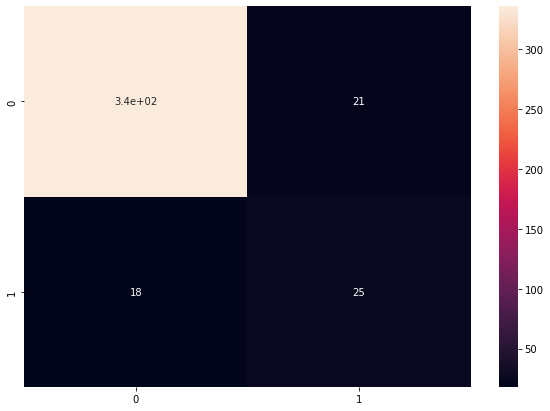

In [46]:
y_pred = myClassifier_entropy.predict(x_test) 
print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Precision = ",precision_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred),"\n")

print(classification_report(y_pred,y_test))

cm=metrics.confusion_matrix(y_test,y_pred)
print("\nconfusion matrix: \n",cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
print("---------------------------------------")



### TRAINING MODEL USING DECISION TREE IMPLEMENTED FROM SCRATCH

### USING GINI INDEX

In [47]:
myClassifier_gini = MyDecisionTreeClassifier(criterion="gini", max_depth=50)
myClassifier_gini.fit(x_train, y_train)
myClassifier_gini.print_tree()

X_10 <= 11.5 ? 0.03625483343863817
 left:X_1 <= 0.4 ? 0.013073495960650688
  left:X_10 <= 10.4 ? 0.03624076396118492
    left:X_9 <= 1.06 ? 0.015289095986072615
        left:X_4 <= 0.075 ? 0.015524624715379298
                left:X_0 <= 11.6 ? 0.08908202314537333
                                left:X_3 <= 1.4 ? 0.04684972395295184
                                                                left:X_0 <= 6.4 ? 0.1111111111111111
                                                                                                                                left:1.0
                                                                                                                                right:X_0 <= 8.7 ? 0.5
                                                                                                                                                                                                                                                                left:0.0
           

### Predicting and Performance metrics of the model

Accuracy =  90.25 %
Precision =  0.5434782608695652
Recall =  0.5813953488372093 

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       354
         1.0       0.58      0.54      0.56        46

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400


confusion matrix: 
 [[336  21]
 [ 18  25]]
---------------------------------------


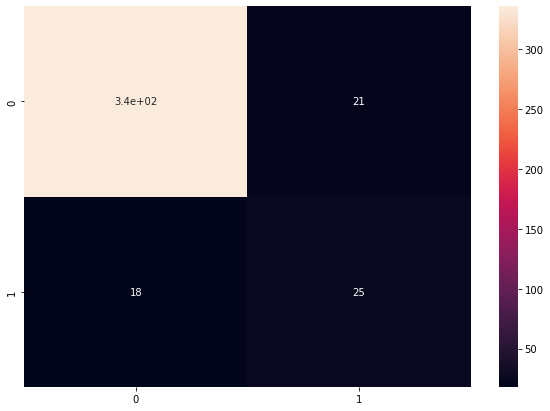

In [48]:
y_pred = myClassifier_gini.predict(x_test) 
print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Precision = ",precision_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred),"\n")

print(classification_report(y_pred,y_test))

cm=metrics.confusion_matrix(y_test,y_pred)
print("\nconfusion matrix: \n",cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
print("---------------------------------------")

## B) DECISION TREE from SKLEARN library ( Inbuilt modules )

## 3. TRAIN THE MODEL
### Entropy


In [66]:
x = df.drop(['quality'], axis=1)
y = df['quality']

In [61]:
#splitting the processed dataset into train and test dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 50)

In [62]:
builtInClassifier_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=50)
builtInClassifier_entropy.fit(x_train, y_train)
preds = builtInClassifier_entropy.predict(x_test)

### Predicting and Performance metrics of the model

In [63]:
y_pred = builtInClassifier_entropy.predict(x_test) 
print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Precision = ",precision_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred),"\n")

print(classification_report(y_pred,y_test))

cm=metrics.confusion_matrix(y_test,y_pred)
print("\nconfusion matrix: \n",cm)
print("---------------------------------------")

Accuracy =  93.25 %
Precision =  0.6904761904761905
Recall =  0.6744186046511628 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       358
           1       0.67      0.69      0.68        42

    accuracy                           0.93       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.93      0.93      0.93       400


confusion matrix: 
 [[344  13]
 [ 14  29]]
---------------------------------------


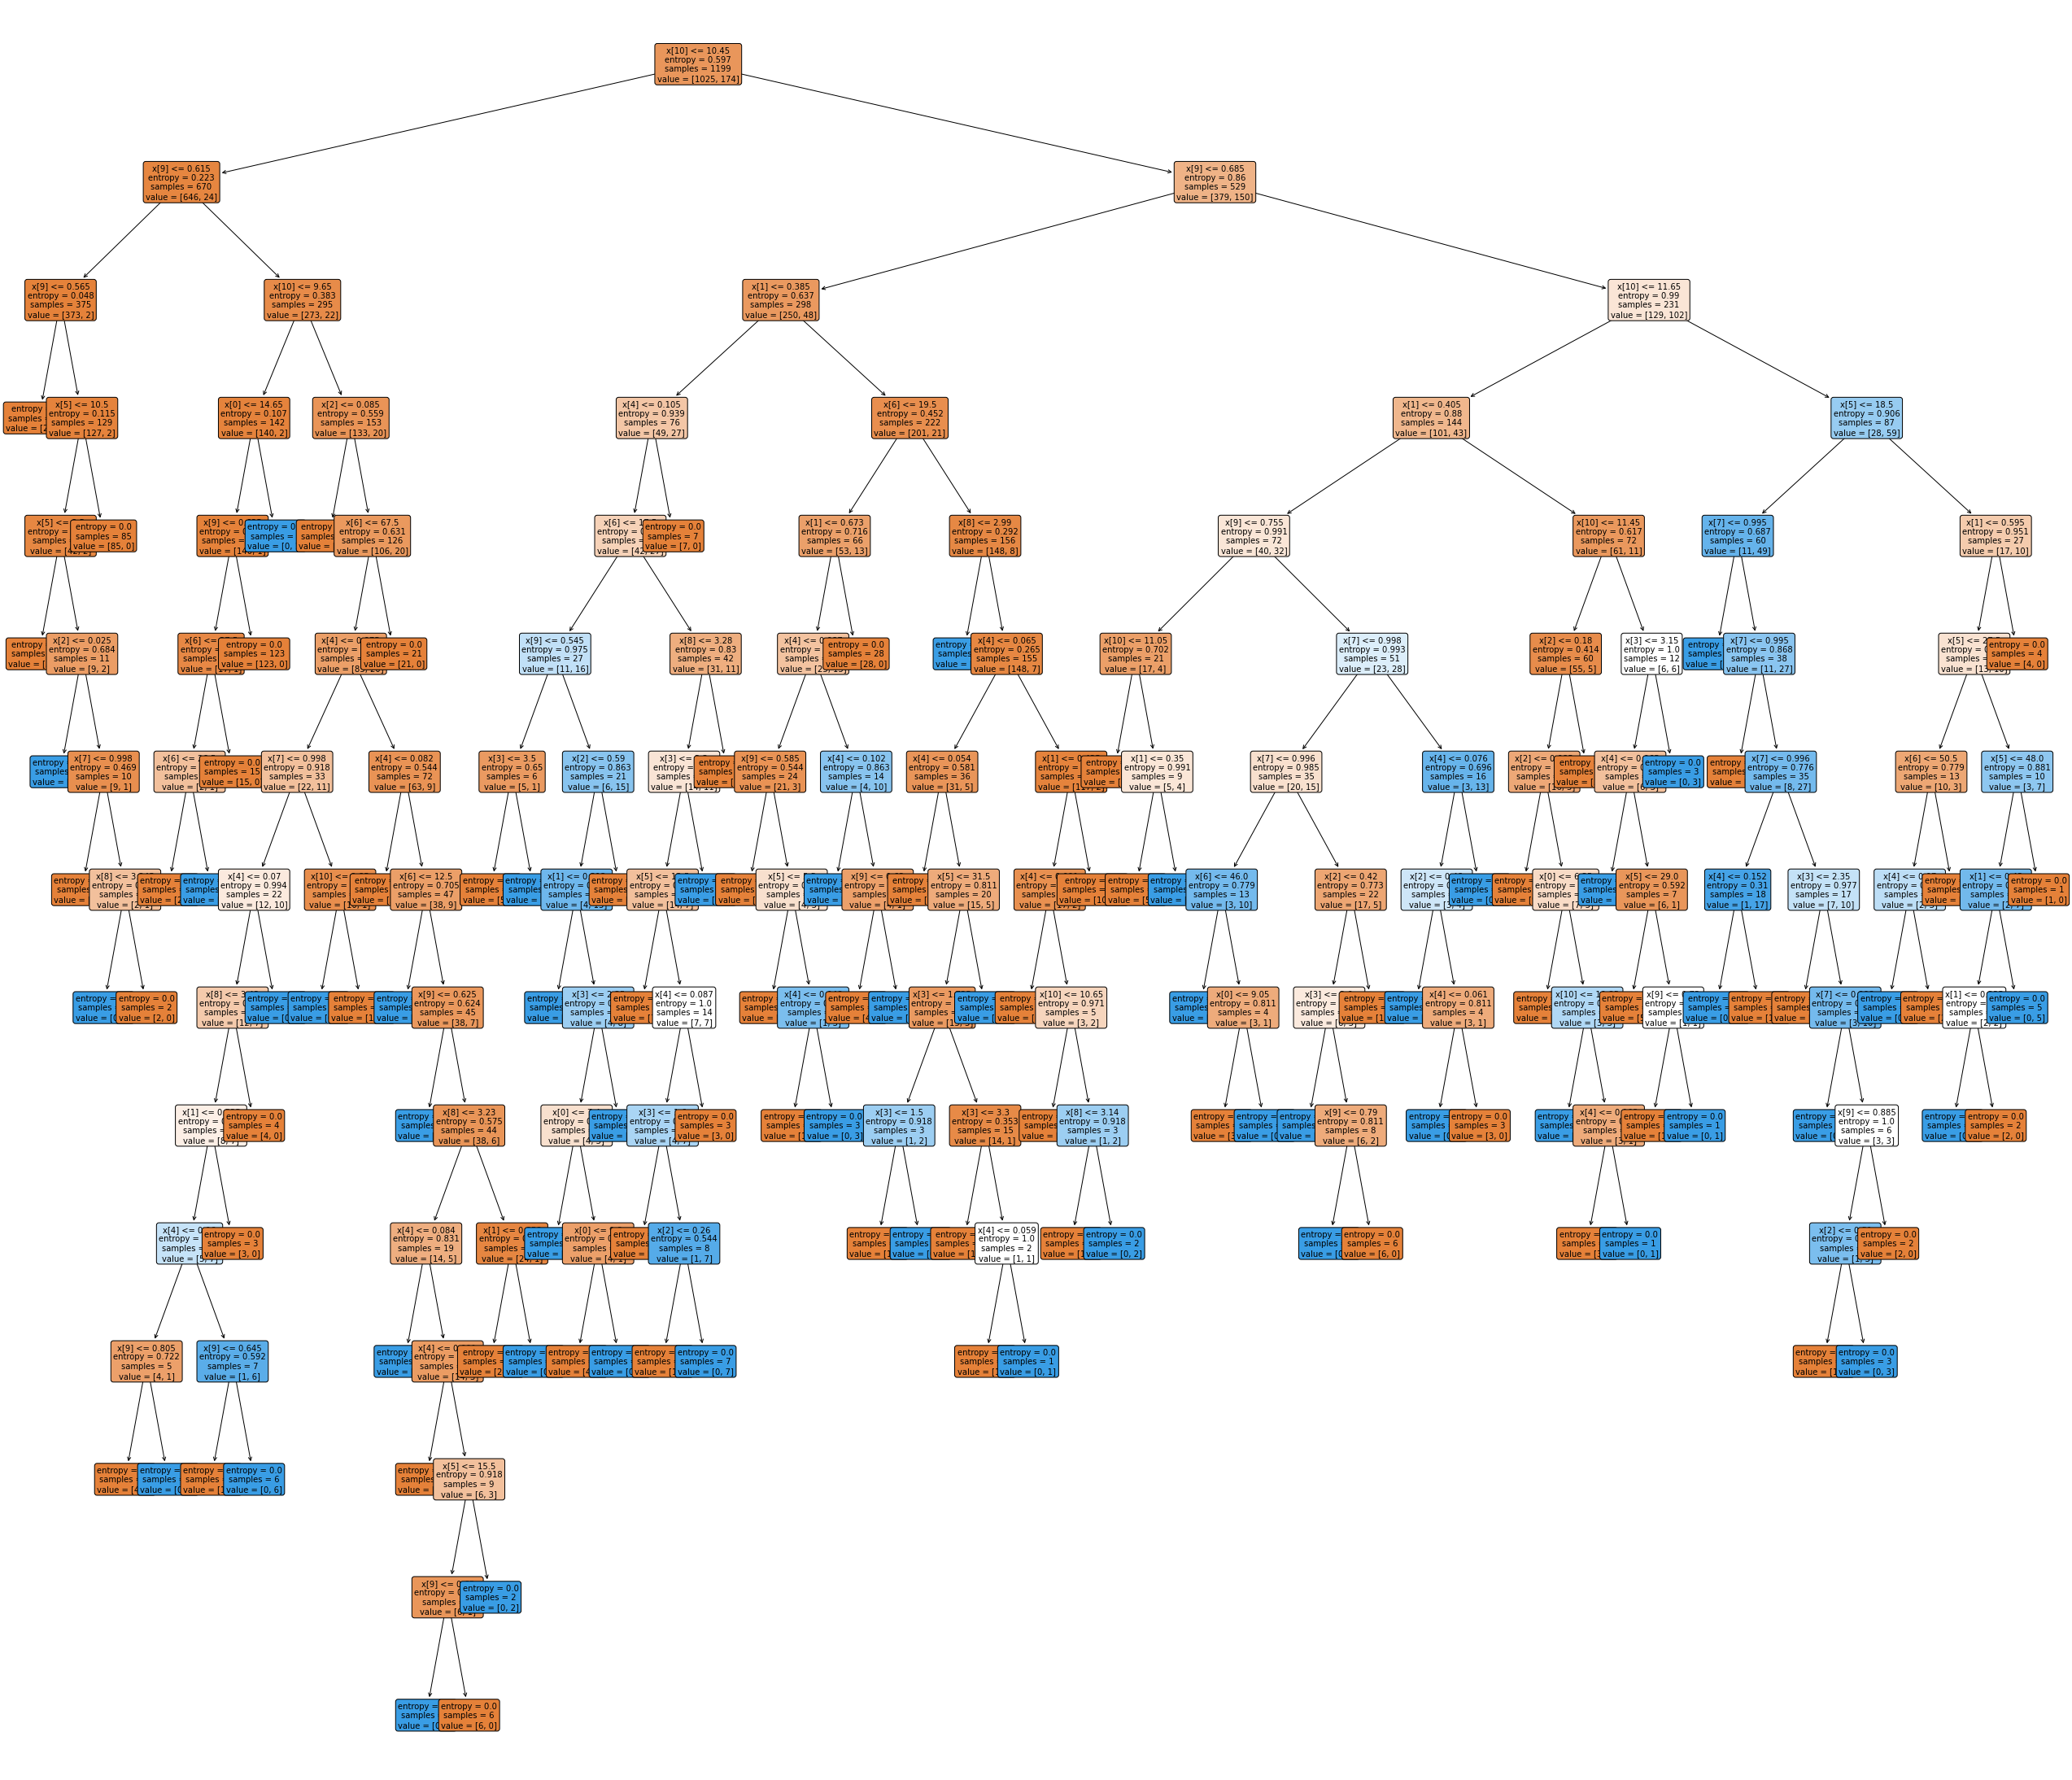

In [64]:
fig = plt.figure(figsize=(45,40))
tree.plot_tree(builtInClassifier_entropy,  filled=True, rounded=True, fontsize=10)
plt.show()

In [67]:
print(tree.export_text(builtInClassifier_entropy, feature_names = x.columns.tolist()))

|--- alcohol <= 10.45
|   |--- sulphates <= 0.62
|   |   |--- sulphates <= 0.56
|   |   |   |--- class: 0
|   |   |--- sulphates >  0.56
|   |   |   |--- free sulfur dioxide <= 10.50
|   |   |   |   |--- free sulfur dioxide <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- free sulfur dioxide >  8.50
|   |   |   |   |   |--- citric acid <= 0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- citric acid >  0.02
|   |   |   |   |   |   |--- density <= 1.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- density >  1.00
|   |   |   |   |   |   |   |--- pH <= 3.25
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- pH >  3.25
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- free sulfur dioxide >  10.50
|   |   |   |   |--- class: 0
|   |--- sulphates >  0.62
|   |   |--- alcohol <= 9.65
|   |   |   |--- fixed acidity <= 14.65
|   |   |   |   |--- sulphates <= 0.62
|   |   |   |   |   |--- total sul

### DECISION TREE from SKLEARN library ( Inbuilt modules )
### GINI INDEX

In [68]:
builtInClassifier_gini = DecisionTreeClassifier(criterion="gini",max_depth=50)
builtInClassifier_gini.fit(x_train, y_train)
preds = builtInClassifier_gini.predict(x_test)
score = builtInClassifier_gini.score(x_test, y_test)
score

0.9175

### Predicting and Performance metrics of the model

In [69]:
y_pred = builtInClassifier_gini.predict(x_test) 
print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Precision = ",precision_score(y_test, y_pred))
print("Recall = ",recall_score(y_test, y_pred),"\n")

print(classification_report(y_pred,y_test))

cm=metrics.confusion_matrix(y_test,y_pred)
print("\nconfusion matrix: \n",cm)
print("---------------------------------------")

Accuracy =  91.75 %
Precision =  0.6190476190476191
Recall =  0.6046511627906976 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       358
           1       0.60      0.62      0.61        42

    accuracy                           0.92       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.92      0.92      0.92       400


confusion matrix: 
 [[341  16]
 [ 17  26]]
---------------------------------------


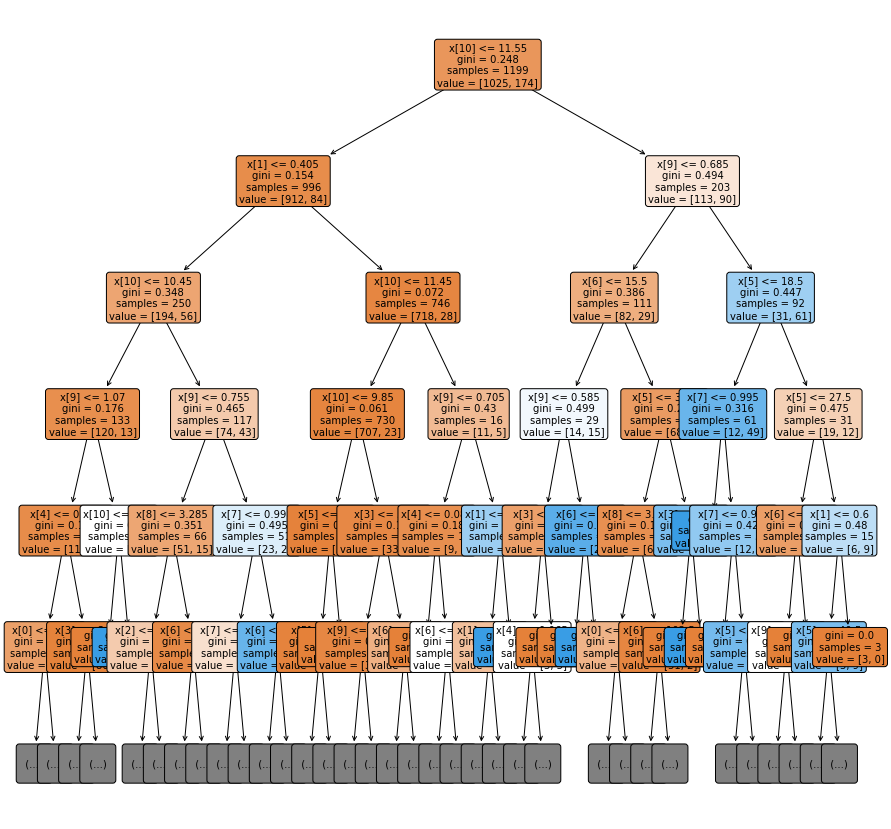

In [70]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(builtInClassifier_gini,  filled=True, rounded=True, max_depth=5, fontsize=10)
plt.show()

In [71]:
print(tree.export_text(builtInClassifier_gini, feature_names = x.columns.tolist()))

|--- alcohol <= 11.55
|   |--- volatile acidity <= 0.41
|   |   |--- alcohol <= 10.45
|   |   |   |--- sulphates <= 1.07
|   |   |   |   |--- chlorides <= 0.08
|   |   |   |   |   |--- fixed acidity <= 11.70
|   |   |   |   |   |   |--- residual sugar <= 1.45
|   |   |   |   |   |   |   |--- density <= 1.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- density >  1.00
|   |   |   |   |   |   |   |   |--- fixed acidity <= 9.15
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- fixed acidity >  9.15
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- residual sugar >  1.45
|   |   |   |   |   |   |   |--- volatile acidity <= 0.39
|   |   |   |   |   |   |   |   |--- sulphates <= 0.84
|   |   |   |   |   |   |   |   |   |--- citric acid <= 0.29
|   |   |   |   |   |   |   |   |   |   |--- pH <= 3.25
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   | 

### Checking the best suited depth of decision tree for the dataset ( this time inbuilt module is used !!)

In [74]:
Ks = 100
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    builtInClassifier = DecisionTreeClassifier(max_depth = n).fit(x_train,y_train)
    yhat=builtInClassifier.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)


[0.8925 0.9075 0.9125 0.905  0.915  0.9175 0.9075 0.9125 0.9125 0.9025
 0.8925 0.9025 0.8925 0.915  0.915  0.9025 0.9025 0.8975 0.905  0.9
 0.9025 0.9    0.9    0.905  0.9075 0.895  0.9    0.91   0.9    0.9125
 0.89   0.9025 0.9075 0.9    0.91   0.915  0.9025 0.905  0.9125 0.8975
 0.9125 0.91   0.9    0.91   0.915  0.9    0.9125 0.9025 0.9075 0.9125
 0.9075 0.915  0.895  0.905  0.915  0.9075 0.905  0.905  0.9075 0.9
 0.9125 0.9075 0.9025 0.915  0.9075 0.905  0.8975 0.9075 0.9075 0.9025
 0.9125 0.8975 0.9    0.9075 0.895  0.9025 0.905  0.92   0.9075 0.91
 0.9    0.905  0.8975 0.91   0.895  0.9025 0.91   0.9    0.9125 0.9125
 0.9    0.9025 0.905  0.9025 0.905  0.9025 0.9025 0.905  0.905 ]


In [75]:
print( "The best accuracy was with", mean_acc.max(), "with depth =", mean_acc.argmax()+1)


The best accuracy was with 0.92 with depth = 78


#### The best accuracy was with 0.9225 with depth = 6

## 4. EVALUATE THE PERFORMANCE OF THE ALGORITHMS:

## COMPARISON OF PERFORMANCE OF BOTH IMPLEMENTATION:

### (i) DECISION TREE from scratch:
#### Entropy:
1. Accuracy =  90.25 %
2. Precision =  0.5434782608695652
3. Recall =  0.5813953488372093 

#### Gini:
1. Accuracy =  90.25 %
2. Precision =  0.5434782608695652
3. Recall =  0.5813953488372093 



### (ii) DECISION TREE using SKlearn module:

#### Entropy:
1. Accuracy =  91.5 %
2. Precision =  0.6097560975609756
3. Recall =  0.5813953488372093 

#### Gini:
1. Accuracy =  90.25 %
2. Precision =  0.5434782608695652
3. Recall =  0.5813953488372093 
 